Jose Penalver Bartolome

Project 1

In [11]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [12]:
true_weights = np.array([[1/6], [2/6], [3/6], [4/6], [5/6]])
sets = 100
seqs = 10
lambdas = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
alphas = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

def walk_generation():
    initial_state = np.array([[0,0,1,0,0]]).T
    current_state = initial_state
    walk = current_state
    position = 2
    reward = 0
    
    while (position >= 0 and position < 5):
        rand = random.randint(0,1)
        if (rand == 1):
            position += 1
        else:
            position -= 1
        if (position >= 0 and position < 5):
            new_state = np.zeros(5)
            new_state[position] = 1
            new_state = np.array([new_state])
            walk = np.concatenate((walk, new_state.T), axis=1)
        else:
            if (position >= 5):
                reward = 1
            if (position < 0):
                reward = 0
            break;
    return (walk, reward)
    

In [13]:
walks = np.full((sets, seqs), None)
rewards = np.full((sets, seqs), None)

for i in range(sets):
    for j in range(seqs):
        walks[i][j], rewards[i][j] = walk_generation()
        
RMSEs = {}
for lam in lambdas:
    RMSEs[lam] = 0.0

In [15]:
alpha = 0.01
for lam in lambdas:
    print(lam)
    for i in range(sets):
        weights = np.array([[0.5,0.5,0.5,0.5,0.5]]).T   
        
        for o in range(50):
            total_change = np.array([[0,0,0,0,0]]).T
            for j in range(seqs):
                error = np.array([[0,0,0,0,0]]).T
                change = np.array([[0,0,0,0,0]]).T
                walk_length = (walks[i][j]).shape[1]
                for k in range(walk_length):
                    temp = walks[i][j][:,[k]]
                    error = lam * error + temp
                    
                    if k < walk_length -1 :
                        t1 = np.dot(weights.T, walks[i][j][:,[k+1]]) - np.dot(weights.T, temp)
                        change = change + alpha * (t1) * error
                        
                    else:
                        t2 = rewards[i][j] - np.dot(weights.T, temp)
                        change = change + alpha * (t2) * error

                total_change = total_change + change
                
            weights = weights + total_change

        RMSEs[lam] += np.sqrt(np.mean((weights-true_weights)**2))
print(RMSEs)

0
0.1
0.3
0.5
0.7
0.9
1.0
{0: 9.124231483529202, 0.1: 9.430198017044972, 0.3: 10.153785292621727, 0.5: 11.079948456089392, 0.7: 12.292126028804635, 0.9: 14.489957105634108, 1.0: 17.32595487473695}


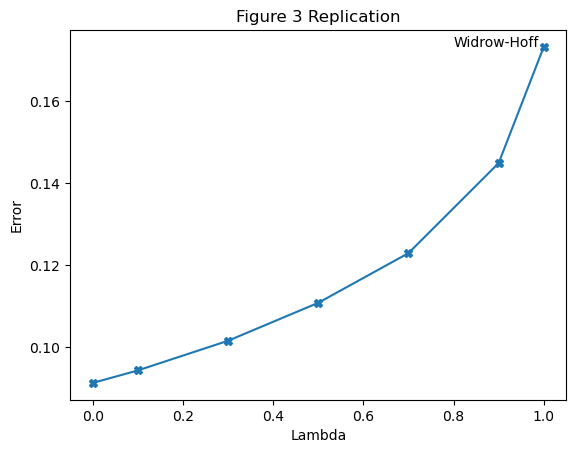

In [16]:
vals = []
for i in RMSEs.values():
    vals.append(i / (sets))
    
plt.plot(lambdas,vals,'-X')

plt.xlabel('Lambda')
plt.ylabel('Error')

plt.title('Figure 3 Replication')
plt.annotate('Widrow-Hoff',(0.8, vals[6]))
plt.show()

In [17]:
RMSEs4 = {}
for lam in lambdas:
    RMSEs4[lam] = {}
    for a in alphas:
        RMSEs4[lam][a] = 0

In [18]:
for lam in lambdas:
    print(lam)
    for a in alphas:
        for i in range(sets):
            weights = np.array([[0.5,0.5,0.5,0.5,0.5]]).T
            
            for j in range(seqs):
                error = np.array([[0,0,0,0,0]]).T
                weight_change = np.array([[0,0,0,0,0]]).T
                walk_length = (walks[i][j]).shape[1]
                for k in range(walk_length):
                    temp = walks[i][j][:,[k]]
                    error = lam * error + temp
                    
                    if k < walk_length -1 :
                        t1 = np.dot(weights.T, walks[i][j][:,[k+1]]) - np.dot(weights.T, temp)
                        weight_change = weight_change + a * t1 * error
                    else:
                        t2 = rewards[i][j] - np.dot(weights.T, temp)
                        weight_change = weight_change + a * t2 * error
                        
                weights = weights + weight_change
            RMSEs4[lam][a] += np.sqrt(np.mean((weights-true_weights)**2))
print(RMSEs4)

0
0.1
0.3
0.5
0.7
0.9
1.0
{0: {0.0: 23.570226039551628, 0.05: 17.47979584363245, 0.1: 13.044109638350115, 0.15: 10.177987345085047, 0.2: 8.869545300050774, 0.25: 9.083248968968856, 0.3: 10.75564079821283, 0.35: 14.24538730776198, 0.4: 21.0736683404611, 0.45: 34.974410865573894, 0.5: 66.50067754632934, 0.55: 140.62273900588474, 0.6: 324.29499925253987}, 0.1: {0.0: 23.570226039551628, 0.05: 17.190752240111955, 0.1: 12.664113290244474, 0.15: 9.850497013476398, 0.2: 8.665683200133907, 0.25: 8.945801529561106, 0.3: 10.354948560820597, 0.35: 12.821105373708752, 0.4: 16.990795013857984, 0.45: 24.79946033358422, 0.5: 40.36904472498453, 0.55: 73.90293558415914, 0.6: 145.9151579032642}, 0.3: {0.0: 23.570226039551628, 0.05: 16.56543001962241, 0.1: 11.915774459949073, 0.15: 9.341234761872443, 0.2: 8.595830657539613, 0.25: 9.263548970285653, 0.3: 10.711240676425426, 0.35: 12.68931313174975, 0.4: 15.409196964753336, 0.45: 19.39063199783068, 0.5: 25.85970632593311, 0.55: 37.60233925988491, 0.6: 59.68

{0: 0.2, 0.1: 0.2, 0.3: 0.2, 0.5: 0.15, 0.7: 0.15, 0.9: 0.1, 1.0: 0.05}


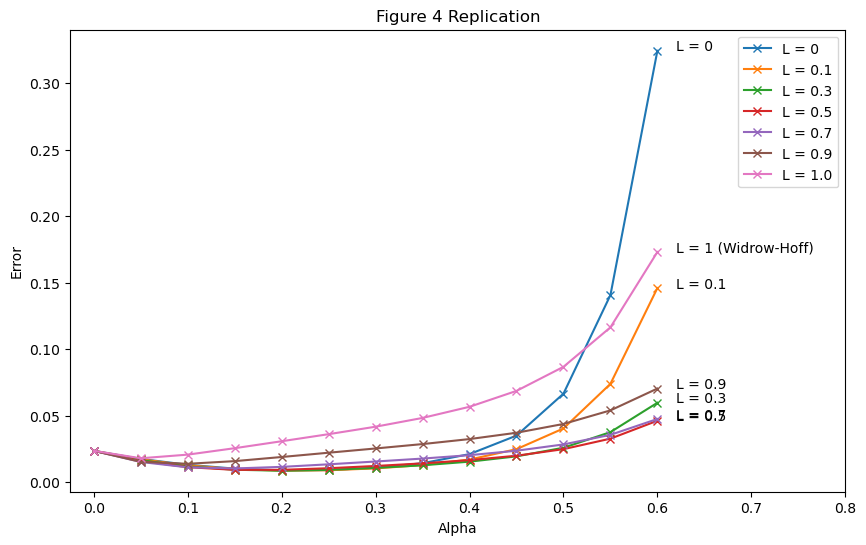

In [19]:
vals = {0:[], 0.1:[], 0.3:[], 0.5:[], 0.7:[], 0.9:[], 1.0:[]}
mins = {0:0, 0.1:0, 0.3:0, 0.5:0, 0.7:0, 0.9:0, 1.0:0} #alpha that yields min value for given lambda
for lam in lambdas:
    min = 10000000
    for a in alphas:
        if (RMSEs4[lam][a] < min):
            mins[lam] = a
            min = RMSEs4[lam][a]
        vals[lam].append(RMSEs4[lam][a] / (sets*seqs))
print(mins)

plt.figure(figsize=(10,6))
for lam in lambdas:
    plt.plot(alphas,vals[lam],'-x',label='L = {}'.format(lam))
    if lam == 1:
        plt.annotate('L = 1 (Widrow-Hoff)', (0.62,vals[lam][len(alphas) - 1]))
    else:    
        plt.annotate('L = {}'.format(lam),(0.62,vals[lam][len(alphas) - 1]))
plt.xlim([-0.025,0.8])
plt.ylabel('Error')
plt.xlabel('Alpha')
plt.title('Figure 4 Replication')
plt.legend()
plt.show()

In [20]:
als = []
for lam in lambdas:
    als.append(mins[lam])
vals = []
for i in range(len(als)):
    lam = lambdas[i]
    a = als[i]
    vals.append(RMSEs4[lam][a] / sets)
print(vals)


[0.08869545300050774, 0.08665683200133907, 0.08595830657539613, 0.09243887872618002, 0.10303029770224835, 0.13807810812788954, 0.17956419314281993]


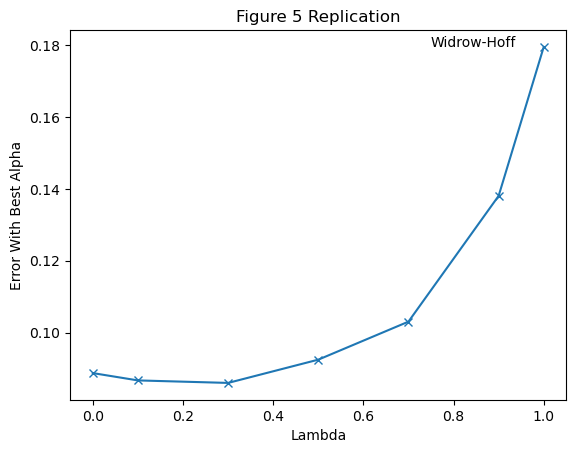

In [21]:
plt.plot(lambdas, vals, '-x')
plt.annotate('Widrow-Hoff', (0.75, vals[len(vals) - 1]), fontsize=10)
plt.ylabel('Error With Best Alpha')
plt.xlabel('Lambda')
plt.title('Figure 5 Replication')
plt.show()